In [2]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
from os.path import join as pjoin
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.backends.backend_pdf import PdfPages
from umap import UMAP
import umap
import umap.plot
import copy
import polars as pl
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.feature_selection import RFECV, RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight
from sklearn.feature_extraction.text import TfidfTransformer
import pickle
import contextily as ctx
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
#import mca

%matplotlib inline

/opt/conda/envs/umap/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-06-17 20:02:28.874978: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-17 20:02:28.875410: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-17 20:02:28.878121: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-17 20:02:28.911139: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performanc

In [19]:
# Sustituye "https://example.com/data.csv" por la URL real del archivo
df = pd.read_csv("/files/camda2024/resistence/git/DataSets/SelectedVariables/ResistanceJoinedStrictBiofiltered.tsv.gz", sep="\t", compression="gzip")

/tmp/ipykernel_3767812/3973436448.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/files/camda2024/resistence/git/DataSets/SelectedVariables/ResistanceJoinedStrictBiofiltered.tsv.gz", sep="\t", compression="gzip")


In [20]:
# Sustituye "https://example.com/data.csv" por la URL real del archivo
df = pd.read_csv("/files/camda2024/resistence/git/DataSets/SelectedVariables/ResistanceJoinedStrictBiofiltered.tsv.gz", sep="\t", compression="gzip")

# Crear la nueva columna combinada con las primeras letras
df['code'] = df['genus'].str[:2] + df['species'].str[0] + df['phenotype'].str[0]

df_code = df.iloc[:, list(range(7)) + [-1] + list(range(7, len(df.columns) - 1))]

df_code

,Unnamed: 0,accession,genus,species,antibiotic,phenotype,measurement_value,code,3000502,3000499,...,3007751-S91I,3007751-T86I,3007751-P116A,3007751-T87I,3007751-S80I,3007751-N87I,3004562-M593T,3003294-D105E,3003304-E540V,3003304-E504V
0,0,GCA_002947415,Acinetobacter,baumannii,meropenem,Resistant,8.0,AcbR,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,GCA_002947845,Acinetobacter,baumannii,meropenem,Resistant,8.0,AcbR,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,GCA_002948925,Acinetobacter,baumannii,meropenem,Resistant,8.0,AcbR,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,GCA_002996805,Acinetobacter,baumannii,meropenem,Resistant,8.0,AcbR,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,GCA_003006035,Acinetobacter,baumannii,meropenem,Resistant,8.0,AcbR,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,7767,SRR3242343,Salmonella,enterica,ciprofloxacin,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
7768,7768,SRR2082856,Salmonella,enterica,ciprofloxacin,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
7769,7769,SRR3242362,Salmonella,enterica,ciprofloxacin,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
7770,7770,SRR1257300,Salmonella,enterica,ciprofloxacin,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Rellenar valores NaN en la columna 'phenotype'
df_code['code'] = df_code['code'].fillna('Target')
df_code.tail()

,Unnamed: 0,accession,genus,species,antibiotic,phenotype,measurement_value,code,3000502,3000499,...,3007751-S91I,3007751-T86I,3007751-P116A,3007751-T87I,3007751-S80I,3007751-N87I,3004562-M593T,3003294-D105E,3003304-E540V,3003304-E504V
7767,7767,SRR3242343,Salmonella,enterica,ciprofloxacin,NaN,NaN,Target,0,0,...,0,0,0,0,0,0,0,0,0,0
7768,7768,SRR2082856,Salmonella,enterica,ciprofloxacin,NaN,NaN,Target,0,0,...,0,0,0,0,0,0,0,0,0,0
7769,7769,SRR3242362,Salmonella,enterica,ciprofloxacin,NaN,NaN,Target,0,0,...,0,0,0,0,0,0,0,0,0,0
7770,7770,SRR1257300,Salmonella,enterica,ciprofloxacin,NaN,NaN,Target,0,0,...,0,0,0,0,0,0,0,0,0,0
7771,7771,SRR4280580,Salmonella,enterica,ciprofloxacin,NaN,NaN,Target,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Filtra el DataFrame por la columna 'phenotype'
df_training = df_code[df_code['phenotype'].isin(['Susceptible', 'Resistant'])]
df_test = df_code[df_code['phenotype'].isin(['Target'])]

labels = df_training['code']
label_encoder = LabelEncoder()

# Fit and transform the labels
encoded_labels = label_encoder.fit_transform(labels)

df_code_num = df_code.iloc[:,8:]
df_code_num

,3000502,3000499,3000656,3000676,3003378,3000237,3003308,3003511,3004597,3002734,...,3007751-S91I,3007751-T86I,3007751-P116A,3007751-T87I,3007751-S80I,3007751-N87I,3004562-M593T,3003294-D105E,3003304-E540V,3003304-E504V
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7768,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7769,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7770,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
labels.unique()

array(['AcbR', 'AcbS', 'CajS', 'CajR', 'EncS', 'EncR', 'EscR', 'EscS',
       'KlpR', 'KlpS', 'NegS', 'NegR', 'PsaS', 'PsaR', 'SaeR', 'SaeS'],
      dtype=object)

/opt/conda/envs/umap/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<Axes: >

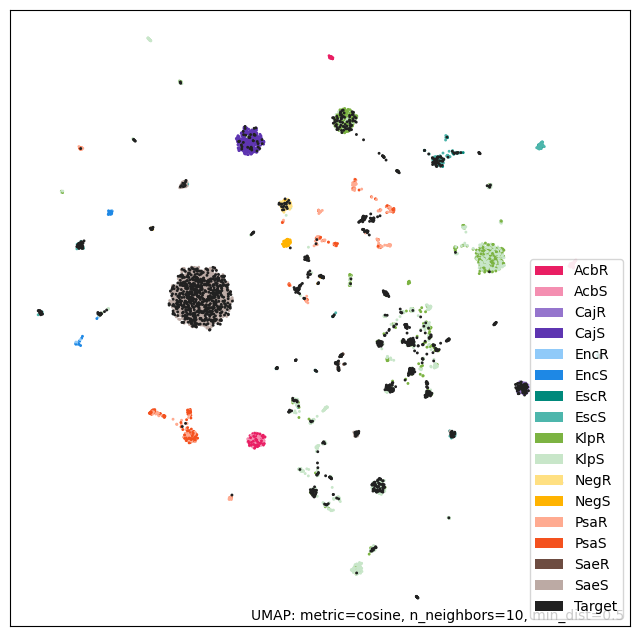

In [25]:
reducer = umap.UMAP(n_neighbors=10, n_components=2, min_dist=0.5, metric='cosine', random_state=42).fit(df_code_num)
umap.plot.points(reducer, labels=df_code.code, color_key = {'AcbR':"#E91E63", 'AcbS':"#F48FB1", 'CajS': "#5E35B1", 'CajR':"#9575CD", 'EncS':"#1E88E5", 'EncR':"#90CAF9", 'EscR':"#00897B",
       'EscS':"#4DB6AC", 'KlpR':"#7CB342", 'KlpS':"#C8E6C9", 'NegS':"#FFB300", 'NegR':"#FFE082", 'PsaS':"#F4511E", 'PsaR':"#FFAB91",
       'SaeR':"#6D4C41", 'SaeS':"#BCAAA4", "Target":"#212121"}
)

# Predicciones

In [27]:
# Sustituye "https://example.com/data.csv" por la URL real del archivo
df = pd.read_csv("/files/camda2024/resistence/git/DataSets/SelectedVariables/ResistanceJoinedStrictBiofiltered.tsv.gz", sep="\t", compression="gzip")

# Crear la nueva columna combinada con las primeras letras
df['code'] = df['genus'].str[:2] + df['species'].str[0] + df['phenotype'].str[0]

df_code = df.iloc[:, list(range(7)) + [-1] + list(range(7, len(df.columns) - 1))]

df_code

/tmp/ipykernel_3767812/1101096562.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/files/camda2024/resistence/git/DataSets/SelectedVariables/ResistanceJoinedStrictBiofiltered.tsv.gz", sep="\t", compression="gzip")


,Unnamed: 0,accession,genus,species,antibiotic,phenotype,measurement_value,code,3000502,3000499,...,3007751-S91I,3007751-T86I,3007751-P116A,3007751-T87I,3007751-S80I,3007751-N87I,3004562-M593T,3003294-D105E,3003304-E540V,3003304-E504V
0,0,GCA_002947415,Acinetobacter,baumannii,meropenem,Resistant,8.0,AcbR,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,GCA_002947845,Acinetobacter,baumannii,meropenem,Resistant,8.0,AcbR,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,GCA_002948925,Acinetobacter,baumannii,meropenem,Resistant,8.0,AcbR,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,GCA_002996805,Acinetobacter,baumannii,meropenem,Resistant,8.0,AcbR,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,GCA_003006035,Acinetobacter,baumannii,meropenem,Resistant,8.0,AcbR,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,7767,SRR3242343,Salmonella,enterica,ciprofloxacin,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
7768,7768,SRR2082856,Salmonella,enterica,ciprofloxacin,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
7769,7769,SRR3242362,Salmonella,enterica,ciprofloxacin,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
7770,7770,SRR1257300,Salmonella,enterica,ciprofloxacin,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Filtra el DataFrame por la columna 'phenotype'
df_training = df_code[df_code['phenotype'].isin(['Susceptible', 'Resistant'])]
df_test = df_code[df_code['phenotype'].isna()]

# Filtra el DataFrame original para seleccionar solo las columnas deseadas
df_filtrado = df_training.iloc[:,8:]
df_filtrado_test = df_test.iloc[:,8:]

labels = df_training['code']
label_encoder = LabelEncoder()

# Fit and transform the labels
encoded_labels = label_encoder.fit_transform(labels)

# Dividir los datos codificados en conjunto de entrenamiento y conjunto de prueba
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(df_filtrado, encoded_labels, stratify=encoded_labels, test_size=test_size, random_state=42)


# Directorio de salida para guardar los resultados y predicciones
output_folder = "output_umap"
os.makedirs(output_folder, exist_ok=True)

trans = umap.UMAP(n_neighbors=10, n_components=10, min_dist=0.5, metric='cosine', random_state=42).fit(X_train)

algorithms = {
    "Random Forest (1200 trees)": RandomForestClassifier(n_estimators=1200, random_state=42),
    "Random Forest (500 trees)": RandomForestClassifier(n_estimators=500, random_state=42),
    "KNN (k=1)": KNeighborsClassifier(n_neighbors=1),
    "KNN (k=3)": KNeighborsClassifier(n_neighbors=3),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "SVM (RBF Kernel)": SVC(kernel='rbf', gamma='auto', C=1, random_state=42),
}
results = {}
test_embedding = trans.transform(X_test)

for algo_name, algo in algorithms.items():
    # Train the model
    algo.fit(trans.embedding_, y_train)

    # Make predictions on the test set
    #y_pred = algo.predict(X_test)

    y_pred = algo.predict(test_embedding)
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    #precision = precision_score(y_test, y_pred)
    #recall = recall_score(y_test, y_pred)
    #roc_auc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Store results
    results[algo_name] = {'accuracy': accuracy, 'f1_score': f1}

    # Plot and save confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {algo_name}')
    plt.savefig(os.path.join(output_folder, algo_name + "_confusion_matrix.png"))
    plt.close()

    # Realiza predicciones en df_test
    tests_embedding = trans.transform(df_filtrado_test)
    test_predictions = algo.predict(tests_embedding)

    # Guarda las predicciones en un archivo CSV
    test_predictions_labels = label_encoder.inverse_transform(test_predictions)
    test_predictions_df = pd.DataFrame({
        'genus': df_test.genus,
        'species': df_test.species,
        'accession': df_test.accession,
        'antibiotic': df_test.antibiotic,
        'status': test_predictions_labels
    })
    test_predictions_df.to_csv(os.path.join(output_folder, algo_name + "_test_predictions-umap.csv"), index=False)

# Guarda los resultados generales en un CSV
results_df_test = pd.DataFrame.from_dict(results, orient='index')
results_df_test.to_csv(os.path.join(output_folder, "overall_results-umap.csv"))

# Save overall results to CSV
#results_df_test = pd.DataFrame.from_dict(results, orient='index')
results_df_test

/opt/conda/envs/umap/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


,accuracy,f1_score
Random Forest (1200 trees),0.837951,0.831594
Random Forest (500 trees),0.839631,0.833620
KNN (k=1),0.808564,0.806818
KNN (k=3),0.837112,0.834005
KNN (k=5),0.847187,0.842303
SVM (RBF Kernel),0.845508,0.831680
